In [6]:
# Importing necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LSTM, Reshape
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

Training Images Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)


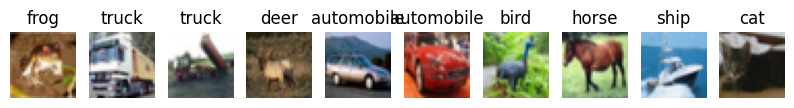

In [7]:
# Load and preprocess the CIFAR-10 dataset
# CIFAR-10 dataset: 60,000 32x32 color images in 10 classes, with 6,000 images per class.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the dataset to understand its structure
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualizing some examples from the CIFAR-10 dataset
def plot_images(images, labels, class_names, n=10):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        ax.imshow(images[i])
        ax.set_title(class_names[np.argmax(labels[i])])
        ax.axis('off')
    plt.show()

# Displaying a few images from the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_images(x_train, y_train, class_names)


In [8]:
# Define the FNN model
def build_fnn_model():
    model_fnn = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the input images (CIFAR-10 has 32x32 images)
        layers.Dense(128, activation='relu'),     # Hidden layer with 128 neurons and ReLU activation
        layers.Dense(10, activation='softmax')    # Output layer with 10 neurons for classification (CIFAR-10 classes)
    ])

    # Compile the model
    model_fnn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',  # Suitable for integer labels
                      metrics=['accuracy'])
    return model_fnn

# Build the FNN model
fnn_model = build_fnn_model()
fnn_model.summary()  # Display model architecture


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 1. Feedforward Neural Network (FNN)
def create_fnn():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),  # Flattening the 32x32x3 images into 1D vectors
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

fnn = create_fnn()
fnn.summary()

# Train FNN
history_fnn = fnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2733 - loss: 2.0367 - val_accuracy: 0.3588 - val_loss: 1.7991
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3737 - loss: 1.7694 - val_accuracy: 0.3773 - val_loss: 1.7335
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3881 - loss: 1.7148 - val_accuracy: 0.3907 - val_loss: 1.7200
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3992 - loss: 1.6825 - val_accuracy: 0.3968 - val_loss: 1.6694
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4138 - loss: 1.6554 - val_accuracy: 0.4134 - val_loss: 1.6525
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.4244 - loss: 1.6319 - val_accuracy: 0.4168 - val_loss: 1.6340
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4321 - loss: 1.6045 - val_accuracy: 0.4252 - val_loss: 1.6081
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4334 - loss: 1.6000 - val_accu

In [10]:
# 2. Convolutional Neural Network (CNN)
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn = create_cnn()
cnn.summary()

# Train CNN
history_cnn = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 96ms/step - accuracy: 0.3229 - loss: 1.8303 - val_accuracy: 0.5151 - val_loss: 1.3466
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.5416 - loss: 1.2797 - val_accuracy: 0.5794 - val_loss: 1.1680
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.5990 - loss: 1.1233 - val_accuracy: 0.6266 - val_loss: 1.0588
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.6453 - loss: 1.0141 - val_accuracy: 0.6461 - val_loss: 1.0154
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.6726 - loss: 0.9370 - val_accuracy: 0.6478 - val_loss: 1.0268
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6933 - loss: 0.8740 - val_accuracy: 0.6832 - val_loss: 0.9126
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.7107 - loss: 0.8327 - val_accuracy: 0.6723 - val_loss: 0.9428
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7271 - loss: 0.7848 - 

In [11]:
# 3. Recurrent Neural Network (RNN) (Approximated for image data using reshaped images)
def create_rnn():
    model = Sequential([
        Reshape((32, 32*3), input_shape=(32, 32, 3)),  # Reshaping for sequence input
        LSTM(64, return_sequences=False),
        Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

rnn = create_rnn()
rnn.summary()

# Train RNN
history_rnn = rnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 32, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,866 (163.54 KB)

 Trainable params: 41,866 (163.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.2570 - loss: 2.0046 - val_accuracy: 0.3870 - val_loss: 1.6957
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.4021 - loss: 1.6503 - val_accuracy: 0.4360 - val_loss: 1.5674
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.4430 - loss: 1.5347 - val_accuracy: 0.4601 - val_loss: 1.4986
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.4830 - loss: 1.4445 - val_accuracy: 0.4963 - val_loss: 1.4012
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5025 - loss: 1.3887 - val_accuracy: 0.4947 - val_loss: 1.4186
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5090 - loss: 1.3613 - val_accuracy: 0.5097 - val_loss: 1.3568
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.5255 - loss: 1.3177 - val_accuracy: 0.5227 - val_loss: 1.3340
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.5372 - loss: 1.2803 - 

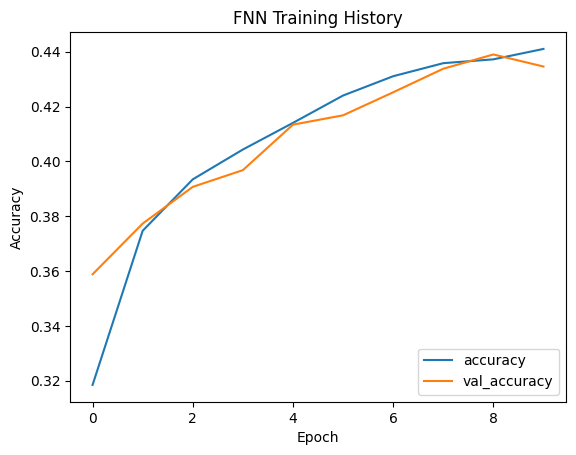

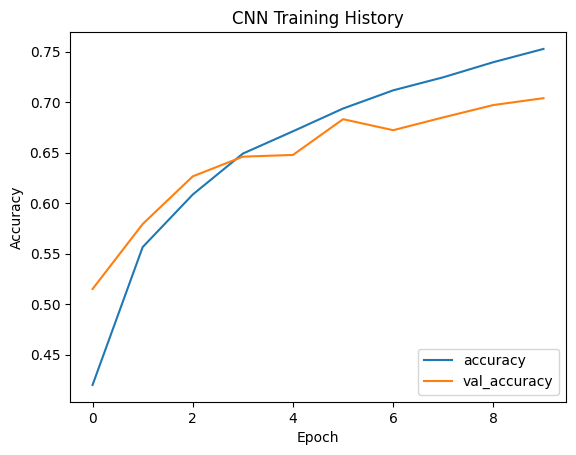

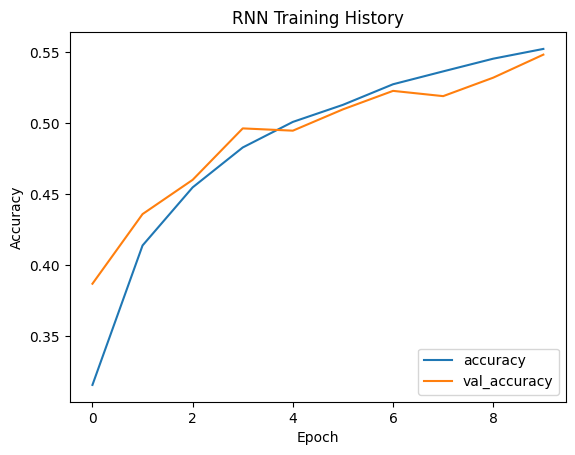

In [12]:
# 4. Visualization of Training Process
def plot_training_history(history, title="Training History"):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Plot training history for all models
plot_training_history(history_fnn, "FNN Training History")
plot_training_history(history_cnn, "CNN Training History")
plot_training_history(history_rnn, "RNN Training History")

313/313 - 1s - 2ms/step - accuracy: 0.4346 - loss: 1.5925
FNN Model Accuracy: 43.46%
313/313 - 4s - 12ms/step - accuracy: 0.7040 - loss: 0.8808
CNN Model Accuracy: 70.40%
313/313 - 3s - 9ms/step - accuracy: 0.5482 - loss: 1.2696
RNN Model Accuracy: 54.82%


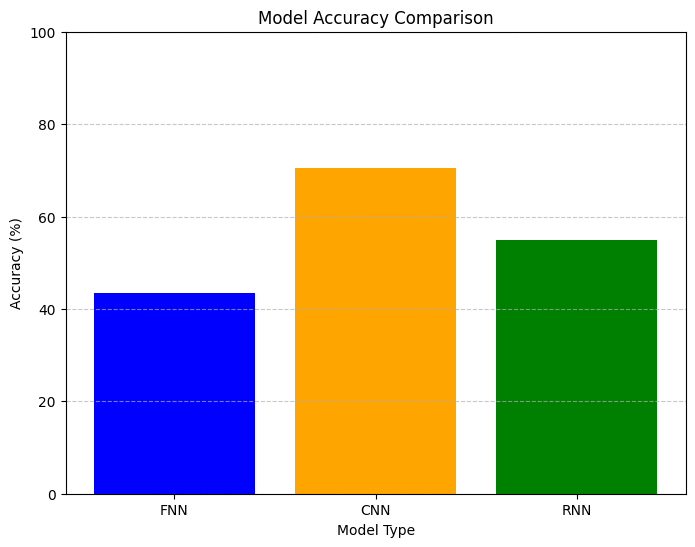

In [14]:
# Evaluate the FNN model
fnn_loss, fnn_accuracy = fnn.evaluate(x_test, y_test, verbose=2)
print(f"FNN Model Accuracy: {fnn_accuracy * 100:.2f}%")

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn.evaluate(x_test, y_test, verbose=2)
print(f"CNN Model Accuracy: {cnn_accuracy * 100:.2f}%")

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn.evaluate(x_test, y_test, verbose=2)
print(f"RNN Model Accuracy: {rnn_accuracy * 100:.2f}%")

# Visualizing the model performance comparison
models = ['FNN', 'CNN', 'RNN']
accuracies = [fnn_accuracy * 100, cnn_accuracy * 100, rnn_accuracy * 100]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model Type')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis to range between 0% and 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
